**Linear programming**, as it is known today, was conceived in 1947 by George B. Dantzig while he was the head of the Air Force Statistical Control’s Combat Analysis Branch at the Pentagon. The military referred to its plans for training, supplying, and deploying combat units as “programs.” When Dantzig analyzed Air Force planning problems, he realized that they could be formulated as a system of linear inequalities— hence his original name for the technique, “programming in a linear structure,” which was later shortened to “linear programming.”

In [1]:
import scipy.optimize

# **A Minimization Model**

*   Two machines, X₁ and X₂. X₁ costs 50usd/hour to run, X₂ costs 80usd/hour to run. The goal is to minimize cost. This can be formalized as a cost function: 50x₁ + 80x₂.
*   X₁ requires 5 units of labor per hour. X₂ requires 2 units of labor per hour. Total of 20 units of labor to spend. This can be formalized as a constraint: 5x₁ + 2x₂ ≤ 20.
*   X₁ produces 10 units of output per hour. X₂ produces 12 units of output per hour. Company needs 90 units of output. This is another constraint. Literally, it can be rewritten as 10x₁ + 12x₂ ≥ 90. However, constraints need to be of the form (a₁x₁ + a₂x₂ + … + aₙxₙ ≤ b) or (a₁x₁ + a₂x₂ + … + aₙxₙ = b). Therefore, we multiply by (-1) to get to an equivalent equation of the desired form: (-10x₁) + (-12x₂) ≤ -90.

In [2]:
# Objective Function: 50x_1 + 80x_2
# Constraint 1: 5x_1 + 2x_2 <= 20
# Constraint 2: -10x_1 + -12x_2 <= -90

result = scipy.optimize.linprog(
    [50, 80],  # Cost function: 50x_1 + 80x_2
    A_ub=[[5, 2], [-10, -12]],  # Coefficients for inequalities
    b_ub=[20, -90],  # Constraints for inequalities
    bounds=(0, None)  # Non-negative constraints for x1 and x2
)

if result.success:
    print(f"X1: {round(result.x[0], 2)} hours")
    print(f"X2: {round(result.x[1], 2)} hours")
    print(f"Minimum Cost: ${round(result.fun, 2)}")
else:
    print("No solution")


X1: 1.5 hours
X2: 6.25 hours
Minimum Cost: $575.0


A minimization problem is formulated the same basic way as a maximization problem, except for a few minor differences. The following sample problem will demonstrate the formulation of a minimization model. A farmer is preparing to plant a crop in the spring and needs to fertilize a field. There are two brands of fertilizer to choose from, Super-gro and Crop-quick. Each brand yields a specific amount of nitrogen and phosphate per bag, as follows:

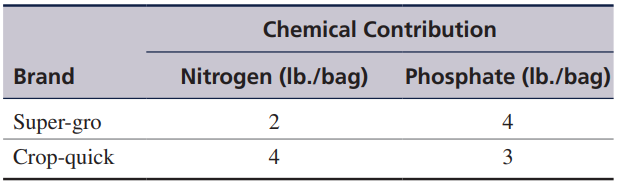

The farmer’s field requires at least 16 pounds of nitrogen and at least 24 pounds of phosphate. Super-gro costs 6 usd per bag, and Crop-quick cost 3 usd. The farmer wants to know how many bags of each brand to purchase to minimize the total cost of fertilizing.

In [12]:
# Objective Function: 6x_1 + 3x_2
# Constraint 1: -2x_1 + -4x_2 <= -16
# Constraint 2: -4x_1 + -3x_2 <= -24

result = scipy.optimize.linprog(
    [6, 3],  # Cost function: 6x_1 + 3x_2
    A_ub=[[-2, -4], [-4, -3]],  # Coefficients for inequalities
    b_ub=[-16, -24],  # Constraints for inequalities
    bounds=(0, None)  # Non-negative constraints for x1 and x2
)


if result.success:
    print(f"X1: {round(result.x[0], 2)} bags of Super-gro")
    print(f"X2: {round(result.x[1], 2)} bags of Crop-quick")
    print(f"Minimum Cost: ${round(result.fun, 2)} farmers total cost of purchasing fertilizer")
else:
    print("No solution")


X1: 0.0 bags of Super-gro
X2: 8.0 bags of Crop-quick
Minimum Cost: $24.0 farmers total cost of purchasing fertilizer


# **A Maximization Model**
Beaver Creek Pottery Company is a small crafts operation run by a Native American tribal council. The company employs skilled artisans to produce clay bowls and mugs with authentic Native American designs and colors. The two primary resources used by the company are special pottery clay and skilled labor. Given these limited resources, the company desires to know how many bowls and mugs to produce each day to maximize profit. This is generally referred to as a product mix problem type. The two products have the following resource requirements for production and profit per item produced

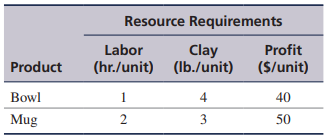

There are 40 hours of labor and 120 pounds of clay available each day for production. We will formulate this problem as a linear programming model by defining each component of the model separately and then combining the components into a single model.

In [5]:
# Objective Function: -40x_1 - 50x_2
# Constraint 1: 1x_1 + 2x_2 <= 40
# Constraint 2: 4x_1 + 3x_2 <= 120

result = scipy.optimize.linprog(
    [-40, -50],  # Fungsi objektif di-negatifkan untuk maksimisasi
    A_ub=[[1, 2], [4, 3]],  # Koefisien kendala
    b_ub=[40, 120],  # Nilai kendala
    bounds=(0, None)  # Non-negatif
)

if result.success:
    # Balik hasil agar kembali ke nilai maksimum
    max_value = -result.fun
    print(f"bowls: {round(result.x[0])}")
    print(f"mugs: {round(result.x[1])}")
    print(f"Maximum Profit: ${round(max_value)}")
else:
    print("No solution")


bowls: 24
mugs: 8
Maximum Profit: $1360
